In [ ]:
! pip install -q kaggle

In [ ]:
# ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

401 - Unauthorized


In [ ]:
!cd drive/My\ Drive

In [ ]:
!pwd

/content


In [ ]:
cd drive

/content/drive


In [ ]:
cd My\ Drive

/content/drive/My Drive


In [ ]:
!unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace store.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
#fix state holiday to string data type
data.StateHoliday = data.StateHoliday.astype(str)

In [ ]:
def count_unique(column):
    return len(column.unique())

data.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [ ]:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

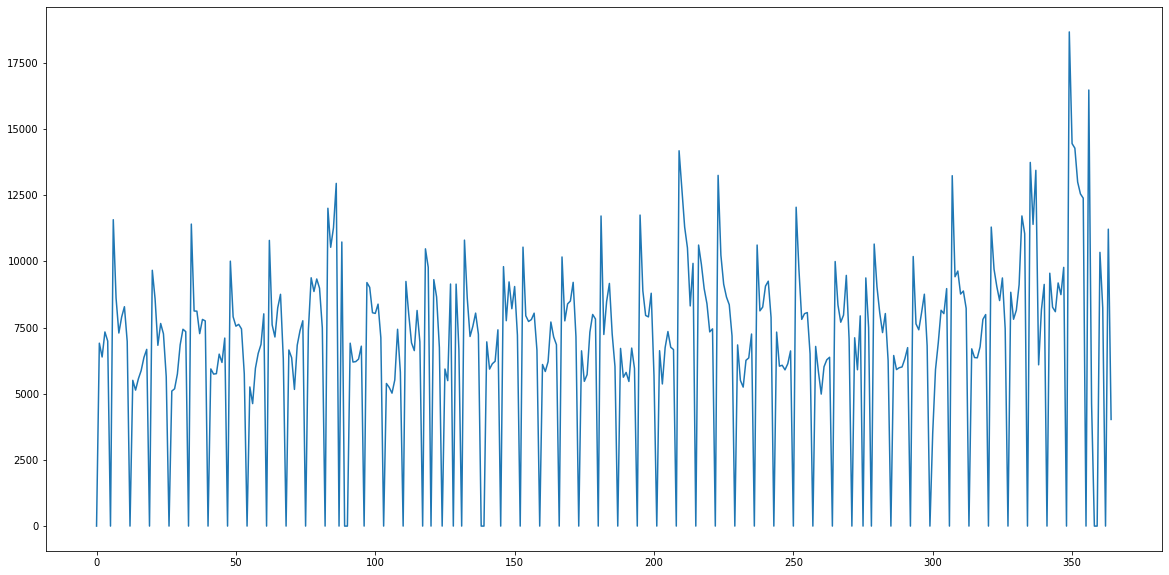

In [ ]:
#visualize data
store_data = data[data.Store==150].sort_values('Date')
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales.values[:365])

In [ ]:
#drop store number date and customers


transformed_data = data.drop(['Store', 'Date', 'Customers'], axis=1)


In [ ]:
transformed_data = pd.get_dummies(transformed_data, columns=['DayOfWeek', 'StateHoliday'])

In [ ]:
transformed_data


,Sales,Open,Promo,SchoolHoliday,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,5263,1,1,1,0,0,0,0,1,0,0,1,0,0,0
1,6064,1,1,1,0,0,0,0,1,0,0,1,0,0,0
2,8314,1,1,1,0,0,0,0,1,0,0,1,0,0,0
3,13995,1,1,1,0,0,0,0,1,0,0,1,0,0,0
4,4822,1,1,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1017205,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1017206,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1017207,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X = transformed_data.drop(['Sales'], axis=1).values
y = transformed_data.Sales.values
print("The training dataset has {} examples and {} features.".format(X.shape[0], X.shape[1]))
#X is the matrix that contains all data from which we want to be able to predict sales data. 
#So before assigning the values of transformed_data to X we drop the Sales column. .
#values finally gives us a matrix of raw values that we can feed to the algorithm.
#y contains only the sales numbers.

The training dataset has 1017209 examples and 14 features.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
kfolds=KFold(n_splits=4)
# kfolds = cv.KFold(X.shape[0], n_folds=4, shuffle=True, random_state=42)
scores =cross_val_score(lr, X, y, cv=kfolds)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))



Accuracy: 0.54 (+/- 0.01)


In [ ]:
lr = LinearRegression()
X_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values
y_store = pd.get_dummies(data[data.Store!=150], columns=['DayOfWeek', 'StateHoliday']).Sales.values
lr.fit(X_store, y_store)
y_store_predict = lr.predict(pd.get_dummies(store_data, columns=['DayOfWeek', 'StateHoliday']).drop(['Sales', 'Store', 'Date', 'Customers'], axis=1).values)


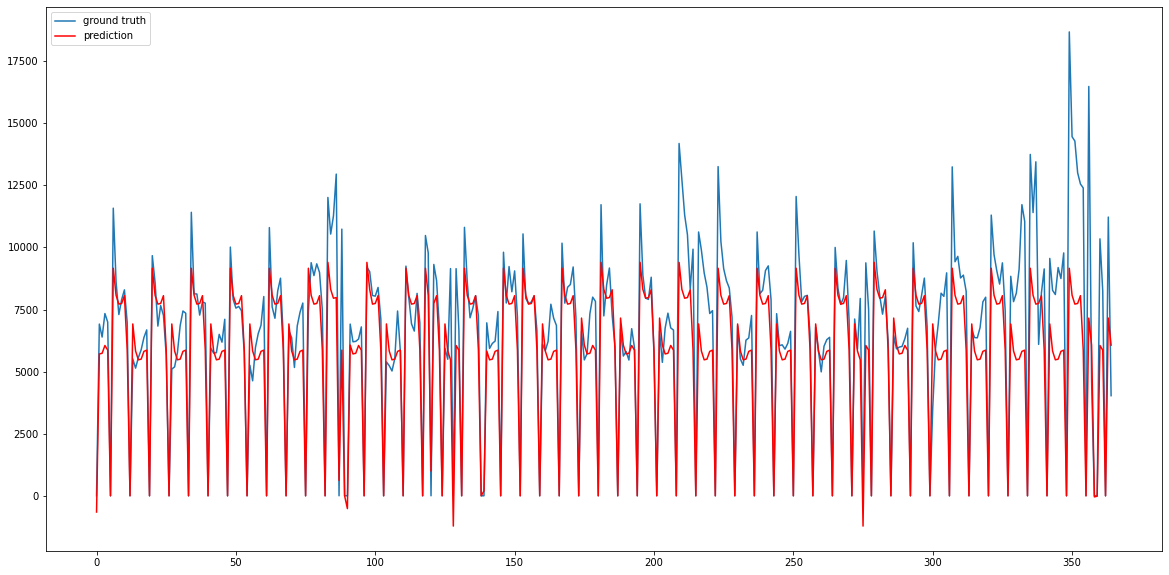

In [ ]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(store_data.Sales.values[:365], label="ground truth")
plt.plot(y_store_predict[:365], c='r', label="prediction")
plt.legend()